# Analisis de datos Olx

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors

## 1. leer y explorar archivo excel:

In [4]:
df = pd.read_excel("olx_chevrolet_2023-02-28.xlsx", header=0)

In [7]:
# Ver los primeros elementos del data frame:
df.head()

,titulo,precio,generacion,kilometraje,ciudad
0,Ala venta chevrolet monza modelo 1987 aldia de...,8000000,1987,300.000,barranquilla
1,Se vende o cambia Chevrolet tracker ls 2015,52500000,2015,9.400,ibagué
2,CHECHEVROLET CHEVY 2007 BUEN ESTADO,18000000,2007,95.000,medellín
3,Chevrolet Tracker LS 1.8 Mec Fwd 2016 183,51000000,2016,111.000,pereira
4,CAMIONETA CHEVROLET TRAILBLAZER MODELO 2003 BE...,19000000,2003,99.997,barranquilla


In [8]:
# Ver con mas detalles el data frame:
df.dtypes

titulo          object
precio           int64
generacion       int64
kilometraje    float64
ciudad          object
dtype: object

In [9]:
# Describir de forma breve los valores estadisticos basicos del data frame:
df.describe()

,precio,generacion,kilometraje
count,4.450000e+02,445.000000,445.000000
mean,4.100272e+07,2011.357303,117.478667
std,3.342461e+07,8.038224,89.647512
min,1.010101e+06,1956.000000,0.000000
25%,2.350000e+07,2008.000000,62.000000
50%,3.400000e+07,2013.000000,100.000000
75%,4.600000e+07,2017.000000,148.000000
max,4.150000e+08,2022.000000,775.700000


In [10]:
# Dimensiones del data frame:
df.shape

(445, 5)

## 2. Analisando el data frame:

In [87]:
dicc1 = dict()
dicc2 = dict()

#### Ciudad vs No. de productos vs Promedio precios (ordenados por el No. de productos):

In [133]:
dicc1 = df["ciudad"].value_counts()
dicc2 = df.groupby(by="ciudad").mean("precio")["precio"]

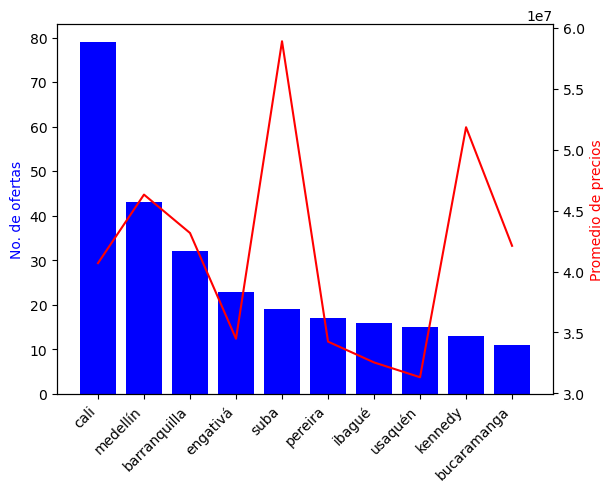

In [134]:
ciudad = list(dicc1.keys()[0:10])
observaciones = list(dicc1[0:10])
promedio = [dicc2[i] for i in ciudad]

fig, axes = plt.subplots()
axes.bar(ciudad, observaciones, color='b')
plt.xticks(rotation=45, ha="right")
axes.set_ylabel('No. de ofertas', color='b')
twin_axes = axes.twinx() 
twin_axes.plot(ciudad, promedio, 'r')
twin_axes.set_ylabel('Promedio de precios', color='r')
plt.show()

#### Ciudad vs No. de productos vs Promedio precios (ordenados por el Promedio precios):

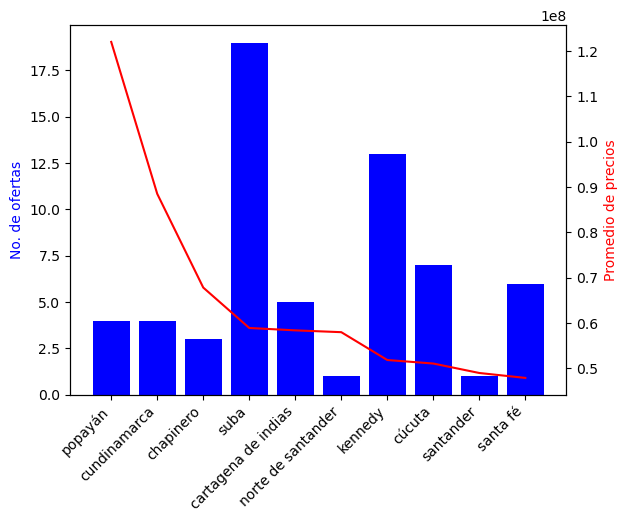

In [136]:
# Grafico de barras:
ciudad = list(dicc2.sort_values(ascending=False).keys()[0:10])
observaciones = [dicc1[i] for i in ciudad]
promedio = list(dicc2.sort_values(ascending=False)[0:10])

fig, axes = plt.subplots()
axes.bar(ciudad, observaciones, color='b')
plt.xticks(rotation=45, ha="right")
axes.set_ylabel('No. de ofertas', color='b')
twin_axes = axes.twinx() 
twin_axes.plot(ciudad, promedio, 'r')
twin_axes.set_ylabel('Promedio de precios', color='r')
plt.show()

#### Generacion del vehiculo:

In [128]:
dicc3 = dict()
dicc4 = dict()

In [130]:
dicc3 = df["generacion"].value_counts()
dicc4 = df.groupby(by="ciudad").mean("generacion")["generacion"]

C:\Users\Adavid\AppData\Local\Temp\ipykernel_12616\4193147786.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  conteo = list(dicc3[:5])


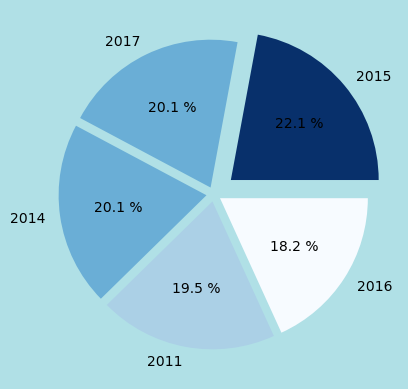

In [139]:
generacion = list(dicc3.keys()[:5])
conteo = list(dicc3[:5])

normdata = colors.Normalize(min(conteo), max(conteo))
colormap = cm.get_cmap("Blues")
colores =colormap(normdata(conteo))
desfase = (0.15, 0.05, 0.05, 0.05, 0.05)
plt.figure(facecolor="powderblue")
plt.pie(conteo , labels=generacion, colors=colores, explode=desfase, autopct="%0.1f %%")
plt.show()

#### Ciudad x No. de ofertas x promedio de generacion:

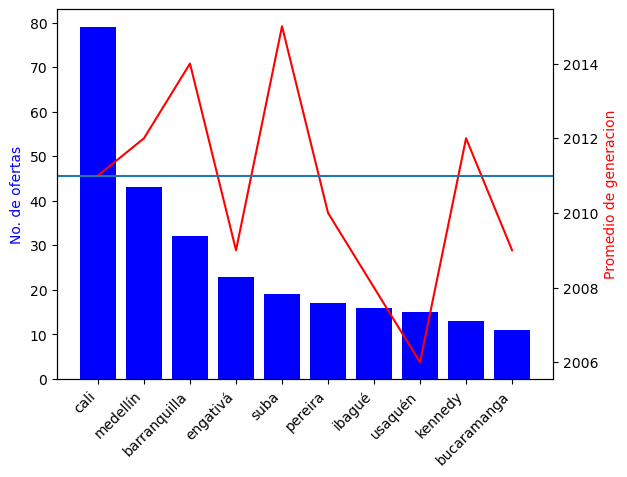

In [142]:
ciudad = list(dicc1.keys()[0:10])
observaciones = list(dicc1[0:10])
promedio = [int(dicc4[i]) for i in ciudad]

fig, axes = plt.subplots()
axes.bar(ciudad, observaciones, color='b')
plt.xticks(rotation=45, ha="right")
axes.set_ylabel('No. de ofertas', color='b')
twin_axes = axes.twinx() 
twin_axes.plot(ciudad, promedio, 'r')
twin_axes.axhline(y=2011)
twin_axes.set_ylabel('Promedio de generacion', color='r')
plt.show()